<a href="https://colab.research.google.com/github/harrycslau/AI4Teachers-assignments/blob/master/FML1w1_Iris-decision-tree-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

# Foundations of Machine Learning 1
## Week 1: Introduction
## Assignment 1: classification with the Iris dataset

### In this first assignment of the course we will go through the basic steps of setting up and training a machine learning model. We also indicate the basic elements of running a Jupyter notebook. 
### This assignment is about classifying Iris flowers into 3 different classes depending on 4 basic characteristics that can be easily measured: sepal/petal length/width. 

Upload this Jupyter notebook to your favourite cloud environment or to your own Python environment. We recommend using Google Collaboratory, that you case access for free at https://colab.research.google.com using your Google account. 

There are two types of cells in the Jupyter notebooks: "markdown" and "code". The markdown cells are used for longer explanations, while the code cells contain the Python instructions that make up your code. They include importing libraries, loading the data, preparing your data, creating and training your models, estimating the final model's quality. You can run the cells one by one, or run the all at once and check their status (ran with errors or not, gave an output, etc.) individually. Comments can also be inserted into the code cells, on lines that start with "#" or on several lines bounded by three apostrophes.

In [1]:
# Import the necessary libraries.

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### The Iris Dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

This dataset consists of data collected on 150 Iris flowers, 50 from each of three types: Setosa, Versicolour, and Virginica. For each flower in the dataset we have its Iris type, its petal and sepal
length and width. The goal of this assignment is to create a model that learns the type of Iris based on its petal and sepal length and width.

In [2]:
# Import the Iris dataset from the sklearn library. 
# The organisation of the data in the sklearn library is described at https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html. 

from sklearn.datasets import load_iris
iris_dataset = load_iris()

#Check the "keys" (column names) of the dataset
print("Components of the Iris dataset:\n", iris_dataset.keys())

Components of the Iris dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### Check the content of the Iris dataset

In [3]:
# Check the component "DESCR" 
print('The full description of the dataset:\n',iris_dataset['DESCR'])

The full description of the dataset:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============

In [4]:
# Check the component "data"
print('The type of the feature "data" is',type(iris_dataset['data']))
print('The shape of the "data" is',iris_dataset['data'].shape)
print("Check the first five rows of data:\n", iris_dataset['data'][:5])

The type of the feature "data" is <class 'numpy.ndarray'>
The shape of the "data" is (150, 4)
Check the first five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


We conclude that we have 150 data points in the dataset, each with 4 features. 

In [5]:
# Check the component "target" 
print('The type of feature "target" is',type(iris_dataset['target']))
print('The shape of the "target" is',iris_dataset['target'].shape)
print('Check the first five targets:', iris_dataset['target'][:5])
print('Check the distinct values of "target":', np.unique(iris_dataset['target']))

The type of feature "target" is <class 'numpy.ndarray'>
The shape of the "target" is (150,)
Check the first five targets: [0 0 0 0 0]
Check the distinct values of "target": [0 1 2]


We conclude that "target" is a vector with 150 entries, one for each of the corresponding rows in "data". There is a numerical (categorical) encoding for the type of Iris of the flower described in that data point. 

In [6]:
# Check the component "target_names" 
print('The type of feature "target_names" is',type(iris_dataset['target_names']))
print('The shape of the "target_names" is',iris_dataset['target_names'].shape)
print('Check the values of "target_names":', iris_dataset['target_names'])

The type of feature "target_names" is <class 'numpy.ndarray'>
The shape of the "target_names" is (3,)
Check the values of "target_names": ['setosa' 'versicolor' 'virginica']


In [7]:
# Check the component "feature_names" 
print('The type of feature "feature_names" is',type(iris_dataset['feature_names']))
print('Check the values of "feature_names":', iris_dataset['feature_names'])

The type of feature "feature_names" is <class 'list'>
Check the values of "feature_names": ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Data exploration
#### Visualization code adapted from: https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn

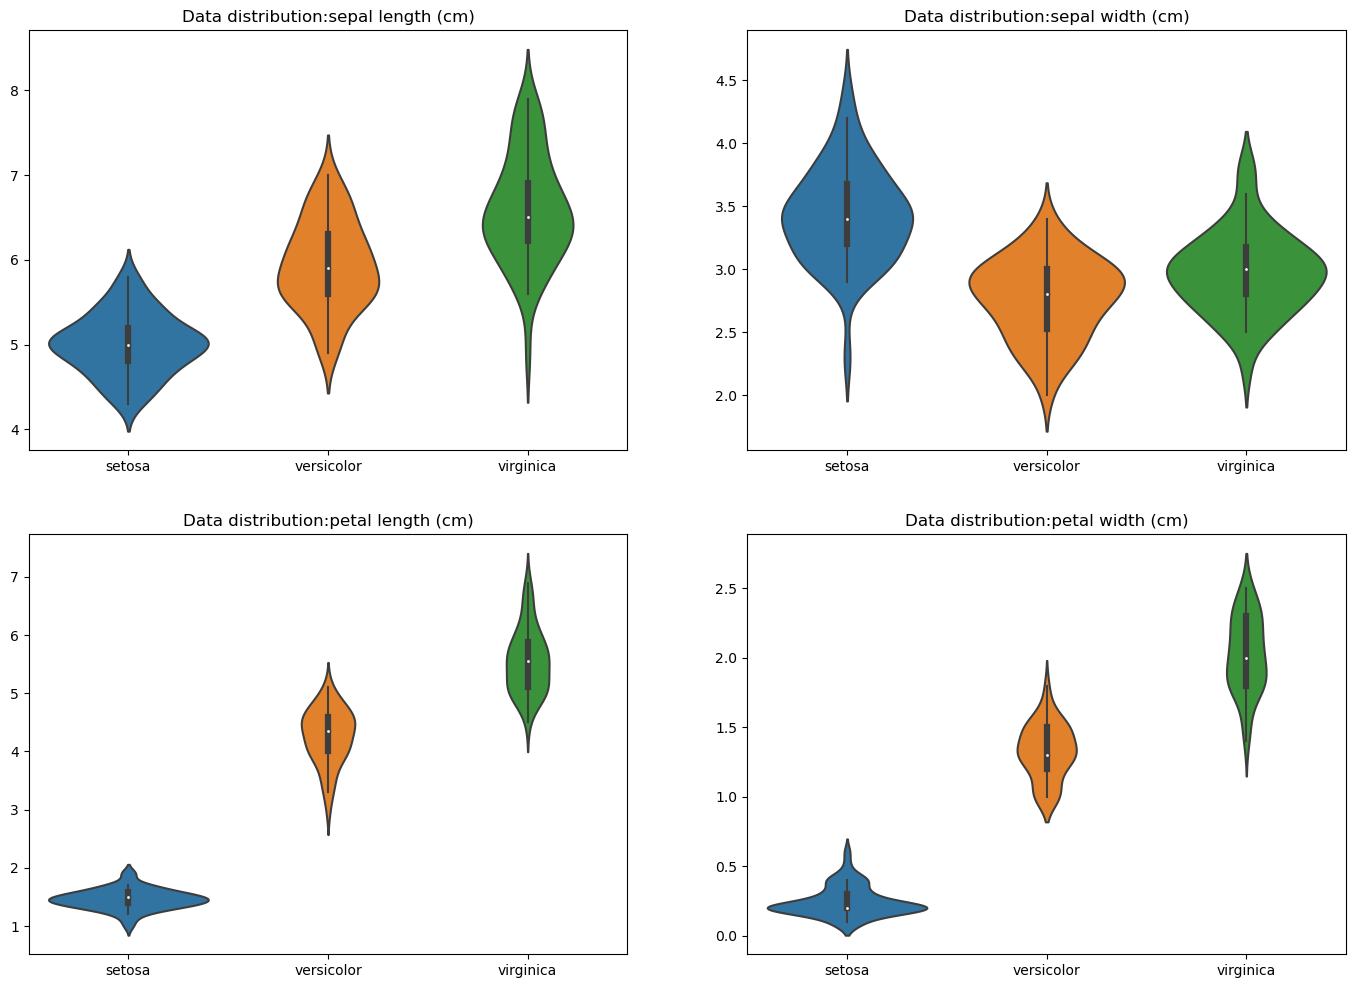

In [8]:
# Just for visualisation purposes we will use the Iris type names, rather than their numerical encoding
iris_dataset_target_n = iris_dataset['target'].astype(str)
for i in range(3):
    iris_dataset_target_n[iris_dataset_target_n == str(i)] = iris_dataset['target_names'][i]

# The plotting function: a violin plot of the data, one feature at a time, grouped by the Iris type
def plot_violin(feature, plot_location):
    ax = plt.subplot(2,2,plot_location)    
    ax.set(title='Data distribution:'+iris_dataset['feature_names'][feature])
    sns.violinplot(
        #x=iris_dataset['target'],
        x=iris_dataset_target_n,
        y=iris_dataset['data'][:,feature], 
        palette = sns.color_palette('tab10', n_colors=3),
        hue = iris_dataset_target_n,
    )
 
# Plot the violin plots, for each of the 4 features
plt.figure(figsize=(17,12))
plot_location = 1
for feature in range(4):
    plot_violin(feature, plot_location)
    plot_location += 1


#### We conclude, especially based on the lower 2 plots, that the 3 classes can be differentiated from each other. So machine learning has a good chance of succeeding on this dataset.

### Prepare for the machine learning phase: split the data into train/validation/test 60/20/20

In [9]:
# Reset the seed of the random number generator, for reproducibility purposes
np.random.seed(2023)

In [10]:
# First split the data into 20% for the testing data and 80% for the training and validation.
# The data is split in a stratified fashion: 
#      the three classes contribute proportionally to the train and the test datasets

from sklearn.model_selection import train_test_split

X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    iris_dataset['data'], 
    iris_dataset['target'], 
    test_size=0.20, 
    shuffle=True,
    random_state=100,
    stratify=iris_dataset['target']
)

In [11]:
# Check the split

print("X_train_valid shape:", X_train_valid.shape)
print("y_train_valid shape:", y_train_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_valid shape: (120, 4)
y_train_valid shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [12]:
# Now split the train_valid data into  separate training and validation data.

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, 
    y_train_valid, 
    test_size=0.25, 
    shuffle=True,
    random_state=200,
    stratify=y_train_valid
)

# Question: why do we set the split ratio here to 25%, 
#     when the previous split was at 20%, if we aim to get equal sized validation and test sets?

In [13]:
# Check the split

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (90, 4)
y_train shape: (90,)
X_valid shape: (30, 4)
y_valid shape: (30,)


Data very often should be normalised and/or scaled to help the learning of the model. This is the right place to normalise/scale the train data, after the split is done, to avoid any data leakage. The exact same normalisation/scaling must be applied separately to the validation and to the test data.

In our case, we scale each of the features to the [0, 1] range. Other choices may also work fine. 

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)

#### Train your first model: decision tree
A decision tree is a simple machine learning model that aims to classify datapoints through a series of "decisions". The yes/no outcome of each decision can be seen as a binary tree, and more decisions can be taken further down on the tree. We only use on this dataset a decision tree of depth at most 2, in other words we aim to classify the Irises through two consequetive questions/decision on their feature. 

Decision trees will be discussed in details later in the course. 

In [15]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier(
    criterion="gini", 
    max_depth=2,
    random_state=2023
)

clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2023)

#### Evaluating the Model

In [16]:
#Test the performance on the train data
print("Model score on the training data: {:.2f}".format(clf2.score(X_train, y_train)))

y_pred_train = clf2.predict(X_train)
print("Predictions on the training set:\n", y_pred_train)
print("Real labels:\n", y_train)

Model score on the training data: 0.98
Predictions on the training set:
 [1 0 0 0 0 0 0 2 0 2 0 1 2 0 1 2 2 2 2 0 0 1 2 2 0 1 1 2 2 2 2 2 0 1 2 1 1
 2 1 2 1 1 1 1 0 1 1 2 0 1 2 1 2 2 0 1 1 0 1 1 1 0 2 2 2 0 1 1 0 0 1 2 2 0
 2 0 2 2 0 2 0 0 1 2 0 0 0 2 1 0]
Real labels:
 [1 0 0 0 0 0 0 2 0 2 0 1 2 0 1 2 2 2 2 0 0 1 2 2 0 1 1 1 2 2 2 1 0 1 2 1 1
 2 1 2 1 1 1 1 0 1 1 2 0 1 2 1 2 2 0 1 1 0 1 1 1 0 2 2 2 0 1 1 0 0 1 2 2 0
 2 0 2 2 0 2 0 0 1 2 0 0 0 2 1 0]


We conclude that the model has an excellent performance on the training dataset with 98% accuracy. 
Let's check its performance on the validation dataset.

In [17]:
#Test the performance on the validation data
print("Model score on the validation data: {:.2f}".format(clf2.score(X_valid, y_valid)))

y_pred_valid = clf2.predict(X_valid)
print("Predictions on the validation set:\n", y_pred_valid)
print("Real labels:\n", y_valid)

Model score on the validation data: 0.33
Predictions on the validation set:
 [2 2 1 2 1 1 2 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2]
Real labels:
 [1 1 0 2 0 0 2 1 1 0 2 0 1 0 1 2 2 2 1 0 2 0 0 1 2 2 1 0 1 2]


#### Assignment 1. 
It looks like the model has very poor performance on the validation set. Why is it so when its performance was excellent on the training set? Fix the problem so that the model shows excellent performance also on the validation set. Report the model score on the validation set in Moodle (hint: it should be over 0.95).

In [ ]:
# Write here your code

#### Assignment 2
Train decision tree models of depth 3 and 4. Check their scores on the train and on the validation datasets. Choose the most suitable model for the problem. What is its depth?

You should expect that more complex models may give better scores. The question you need to consider is whether the increased complexity justifies the increase in the score. In this assignment, consider scores within 0.03 of each other as being similarly good. Choose the smallest/simplest model as your final model.

In [ ]:
# Write here your code

#### Assignment 3. 
What is the model score on the test set?

In [ ]:
# Write here your code

#### Assignment 4
The decision tree classifier can offer a ranking of the feature importances. Intuitively, the more a feature was consulted in the decision nodes of a tree, the higher its importance. Check online in the sklearn library how to get the "feature importances" ranking. What are the 2 most important features of your model? 

In [ ]:
# Write here your code